In [223]:
# A pedestrian implementation of a pedestrian method
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

def diff_eq(u1,u2):
    u_dot = np.array([u2 -(1.8*u1)**2 * np.exp(-u1), (0.7+0.5)**(-2)-u2])
    return u_dot

def euler_forward(h, u_0, t):
    steps = int(t/h)
    u_t=u_0
    trajectory= u_0
    i=0
    while(i < steps):
        u_t= u_t + h*diff_eq(u_t[0], u_t[1])
        trajectory=np.append(trajectory, u_t, axis=0)
        i=i+1
    trajectory=np.reshape(trajectory, (steps+1, 2))
    return trajectory
    

In [224]:
data=euler_forward(0.1, [1,2], 10)

In [240]:
def plotfunc(num_startpoints, stepsize):
    for i in range(num_startpoints+1):
        for j in range(num_startpoints+1):
            if((i*2/num_startpoints==0) or (i*2/num_startpoints==2) or j*2/num_startpoints==0 or j*2/num_startpoints==2):
                data=euler_forward(stepsize,[i*2/num_startpoints,j*2/num_startpoints], 10)
                plt.plot(data[:,0], data[:,1])


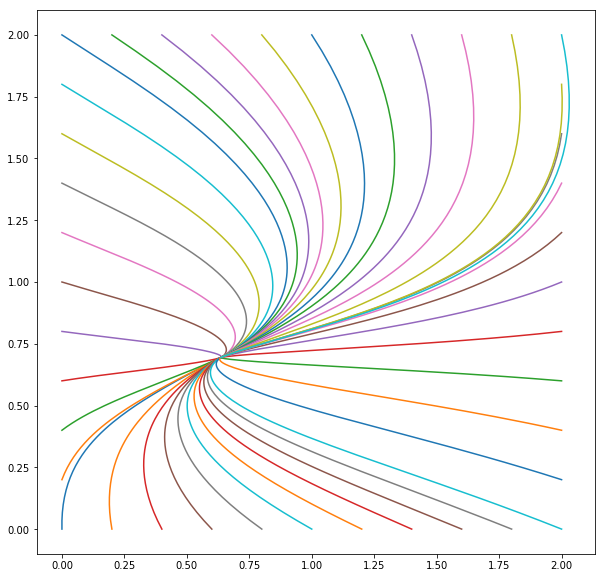

In [245]:
plotfunc(10,0.05)

## 2. Glycolysis Model

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

\begin{align*}
\dot{u}_1 =& -u_1 + u_2 \cdot (\alpha + u_1^2) \\
\dot{u}_2 =& \beta - u_2 \cdot (\alpha + u_1^2)
\end{align*}

In [0]:
a = .1
b = 1.

def glycolysis(u, t):
    u_1 = u[0]
    u_2 = u[1]
    
    p = u_2 * (a + u_1**2)
    
    f_1 = -u_1 + p
    f_2 = b - p
    
    return [f_1, f_2]

def nullcline_1(u_1):
    return u_1 / (a + u_1**2)

def nullcline_2(u_1):
    return b / (a + u_1**2)

fixpoint = (b, b / (a + b**2))

In [0]:
t_range = np.linspace(0, 100, 10000)
solutions = []
for i in np.linspace(0, 8, 41):
    u0 = [i, 0]
    sol = odeint(glycolysis, u0, t_range)
    u_1 = sol[:,0]
    u_2 = sol[:,1]
    solutions.append((u_1,u_2))
    
    u0 = [0, i]
    sol = odeint(glycolysis, u0, t_range)
    u_1 = sol[:,0]
    u_2 = sol[:,1]
    solutions.append((u_1,u_2))

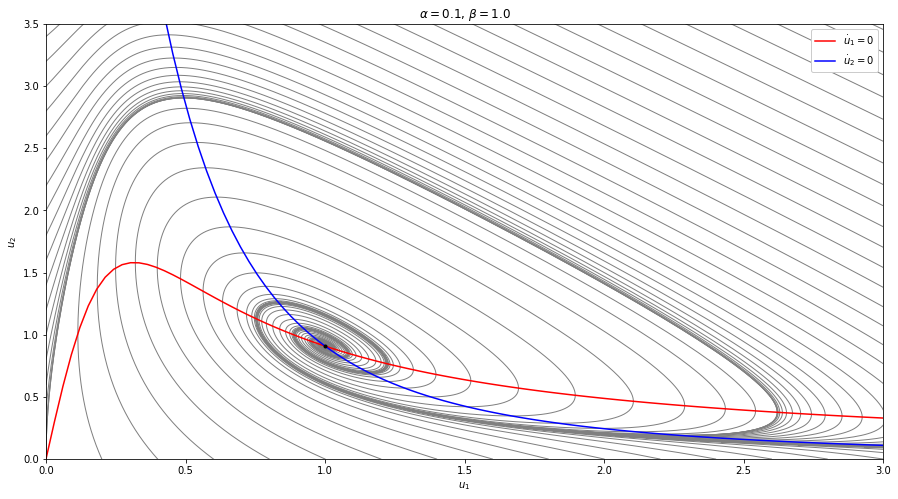

In [0]:
fig = plt.figure()
ax = plt.subplot()

ax.set_title(r'$\alpha={}$, $\beta={}$'.format(a, b))

x_max = 3
u_range = np.linspace(0, x_max, 100)

for solution in solutions:
    ax.plot(*solution, color='0.5', linewidth=1)
    
ax.plot(u_range, nullcline_1(u_range), color='r', label=r'$\dot{u}_1 = 0$')
ax.plot(u_range, nullcline_2(u_range), color='b', label=r'$\dot{u}_2 = 0$')

ax.plot(*fixpoint, marker='.', color='k')

ax.legend(framealpha=1, fancybox=True)
    
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')

ax.set_xlim(0, x_max)
ax.set_ylim(0, 3.5)
    
fig.set_size_inches(15,8)
plt.show()

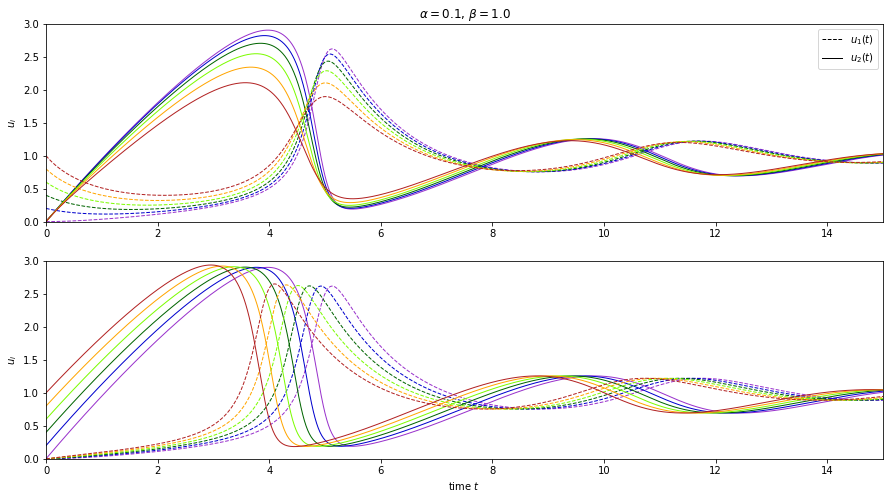

In [0]:
fig = plt.figure()
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2 ,1), (1, 0))

ax1.set_title(r'$\alpha={}$, $\beta={}$'.format(a, b))

colors = ['darkorchid', 'mediumblue', 'darkgreen', 'lawngreen', 'orange', 'firebrick']

u1_example = plt.Line2D([0], [0], color='k', linewidth=1, linestyle='--')
u2_example = plt.Line2D([0], [0], color='k', linewidth=1, linestyle='-')

ax1.legend([u1_example, u2_example], [r'$u_1(t)$', r'$u_2(t)$'], fancybox=True)

for solution, c in zip(solutions[::2], colors):
    ax1.plot(t_range, solution[0], color=c, linewidth=1, linestyle='--')
    ax1.plot(t_range, solution[1], color=c, linewidth=1)
        
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 3)
ax1.set_ylabel(r'$u_i$')

for solution, c in zip(solutions[1::2], colors):
    ax2.plot(t_range, solution[0], color=c, linewidth=1, linestyle='--')
    ax2.plot(t_range, solution[1], color=c, linewidth=1)
    
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 3)
ax2.set_xlabel(r'time $t$')
ax2.set_ylabel(r'$u_i$')
    
fig.set_size_inches(15,8)
plt.show()

## 4. Saddle Node Bifurcation

In [0]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

\begin{align*}
\dot{u} = \mu - u^2
\end{align*}

### a)

![sketch 1](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/4_a_1.jpg)

### b)

In [0]:
def saddle_node_bifurcation(u, t=None, mu=1.):    
    return (mu - u**2)

def u_fix(mu):
    if mu >= 0:
        u_i = [np.sqrt(mu), -np.sqrt(mu)]
    else:
        u_i = []
        
    stability = []
    for u in u_i:
        deriv = -2 * u
        if deriv < 0:
            stability.append(-1)
        elif deriv > 0:
            stability.append(1)
        else:
            stability.append(0)
    
    return list(map(list, zip(*[u_i, stability])))

In [0]:
t_range = np.linspace(0, 1, 1000)
mus = [-1, 0, 1]
u0s = np.linspace(-6, 6, 90)
scenario = {}
for mu in mus:
    scenario[mu] = {}
    for u in u0s:
        u0 = (u,)
        sol = solve_ivp(lambda t, y: saddle_node_bifurcation(y, t, mu), t_span=(t_range[0],t_range[-1]), y0=u0, t_eval=t_range)
        scenario[mu][u0] = (sol.y[0], sol.t)

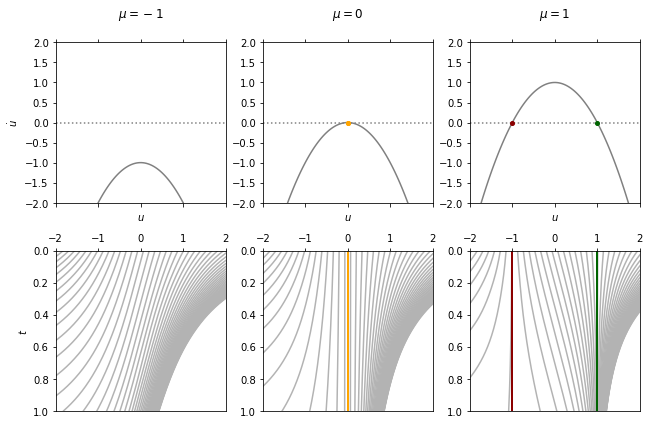

In [0]:
axs = {}
n_mu = len(mus)
colors = {-1:'darkgreen', 0:'orange', 1:'darkred'}
u_range = np.linspace(-2, 2, 100)

fig = plt.figure()

for i, mu in enumerate(mus):
    axs[(mu,'t')] = plt.subplot2grid((2, n_mu), (1, i))
    axs[(mu,'u')] = plt.subplot2grid((2, n_mu), (0, i))
    axs[(mu,'u')].set_title(r'$\mu={}$'.format(mu), pad=25)
    
for mu, solutions in scenario.items():
    fix_points = u_fix(mu)
    
    axs[(mu,'u')].plot(u_range, saddle_node_bifurcation(u_range, mu=mu), color='0.5')
    axs[(mu,'u')].plot((u_range[0], u_range[-1]), (0, 0), color='0.5', linestyle=':')
    axs[(mu,'u')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'u')].set_ylim(-2, 2)
    
    for n0, solution in solutions.items():
        axs[(mu,'t')].plot(*solution, label=r'$n_0={}$'.format(n0), color='0.7')
        
    for fix, stab in fix_points:
        c = colors[stab]
        axs[(mu,'t')].plot((fix, fix), (t_range[0], t_range[-1]), color=c, linewidth=2)
        axs[(mu,'u')].plot(fix, 0, marker='.', color=c, markersize=8)
        
    axs[(mu,'t')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'t')].set_ylim(0, t_range[-1])
    axs[(mu,'t')].invert_yaxis()
    axs[(mu,'u')].set_xlabel(r'$u$', labelpad=10)
    axs[(mu,'t')].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axs[(mu,'u')].tick_params(top=True, labeltop=False, bottom=True, labelbottom=False)
    
axs[(mus[0],'t')].set_ylabel(r'$t$')
axs[(mus[0],'u')].set_ylabel(r'$\dot{u}$')

fig.set_size_inches(n_mu*3, 6)
fig.tight_layout()
plt.show()

## 5. Globally Stable Subcritical Pitchfork Bifurcation

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

\begin{align*}
\dot{u} = f(u,\mu) = -u \left[ \left(u^2 - 1 \right)^2 - \mu -1 \right]
\end{align*}

### a)

Fixpoints $u_0$ of the system:

\begin{align*}
u_0 \in \left\{0,\ \pm \sqrt{1 \pm \sqrt{1+\mu}} \right\}
\end{align*}

Derivative of $f(u)$:

\begin{align*}
\frac{df}{du} = \mu - 5 \cdot u^4 + 6 \cdot u^2
\end{align*}

Check stability for each $u_0$, dependent on $\mu$, by looking at the derivative of $f(u,\mu)$ at $u_0$:

\begin{array}{c|c}
u_0 & \frac{df}{du}|_{u_0} & \text{stable} & \text{critical} & \text{unstable} \\ \hline
0 & \mu & \mu < 0 & \mu = 0 & \mu > 0 \\
+\sqrt{1+\sqrt{1+\mu}} & -4\cdot\left(1+\mu+\sqrt{\mu+1}\right) & \mu>-1 & \mu=-1 & \mu<-1 \\
-\sqrt{1+\sqrt{1+\mu}} & -4\cdot\left(1+\mu+\sqrt{\mu+1}\right) & \mu>-1 & \mu=-1 & \mu<-1 \\
+\sqrt{1-\sqrt{1+\mu}} & -4\cdot\left(1+\mu-\sqrt{\mu+1}\right) & \mu>0 & \mu=-1,\ 0 & \mu<0\land \mu\ne-1 \\
-\sqrt{1-\sqrt{1+\mu}} & -4\cdot\left(1+\mu-\sqrt{\mu+1}\right) & \mu>0 & \mu=-1,\ 0 &\mu<0\land \mu\ne-1
\end{array}

### b)

![sketch 1](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/5_b_1.jpg)
![sketch 2](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/5_b_2.jpg)

### c)

In [0]:
def subcritical_pitchfork_bifurcation(u, t=None, mu=1.):    
    return -u * ((u**2 - 1)**2 - mu -1)

def u_fix(mu):
    u_i = [0]
    if (1 + mu) >= 0:
        u_i += [+np.sqrt(1 + np.sqrt(1 + mu)),
                -np.sqrt(1 + np.sqrt(1 + mu))]
        if (1 - np.sqrt(1 + mu)) >= 0:
            u_i += [+np.sqrt(1 - np.sqrt(1 + mu)),
                    -np.sqrt(1 - np.sqrt(1 + mu))]
        
    stability = []
    for u in u_i:
        deriv = mu - 5 * u**4 + 6 * u**2
        if deriv < 0:
            stability.append(-1)
        elif deriv > 0:
            stability.append(1)
        else:
            stability.append(0)
    
    return list(map(list, zip(*[u_i, stability])))

In [0]:
t_range = np.linspace(0, 1, 10000)
mus = [-1.5, -1, -.5, 0, .5]
u0s = np.linspace(-30, 30, 300)
scenario = {}
for mu in mus:
    scenario[mu] = {}
    for u0 in u0s:
        sol = odeint(subcritical_pitchfork_bifurcation, u0, t_range, args=(mu,))
        scenario[mu][u0] = sol[:,0]

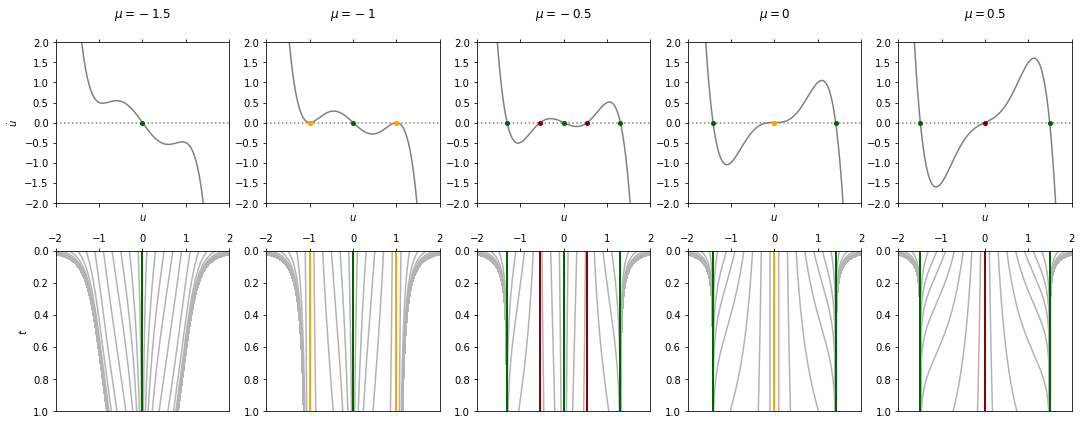

In [0]:
axs = {}
n_mu = len(mus)
colors = {-1:'darkgreen', 0:'orange', 1:'darkred'}
u_range = np.linspace(-2, 2, 100)

fig = plt.figure()

for i, mu in enumerate(mus):
    axs[(mu,'t')] = plt.subplot2grid((2, n_mu), (1, i))
    axs[(mu,'u')] = plt.subplot2grid((2, n_mu), (0, i))
    axs[(mu,'u')].set_title(r'$\mu={}$'.format(mu), pad=25)
    
for mu, solutions in scenario.items():
    fix_points = u_fix(mu)
    
    axs[(mu,'u')].plot(u_range, subcritical_pitchfork_bifurcation(u_range, mu=mu), color='0.5')
    axs[(mu,'u')].plot((u_range[0], u_range[-1]), (0, 0), color='0.5', linestyle=':')
    axs[(mu,'u')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'u')].set_ylim(-2, 2)
    
    for n0, solution in solutions.items():
        axs[(mu,'t')].plot(solution, t_range, label=r'$n_0={}$'.format(n0), color='0.7')
        
    for fix, stab in fix_points:
        c = colors[stab]
        axs[(mu,'t')].plot((fix, fix), (t_range[0], t_range[-1]), color=c, linewidth=2)
        axs[(mu,'u')].plot(fix, 0, marker='.', color=c, markersize=8)
        
    axs[(mu,'t')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'t')].set_ylim(0, t_range[-1])
    axs[(mu,'t')].invert_yaxis()
    axs[(mu,'u')].set_xlabel(r'$u$', labelpad=10)
    axs[(mu,'t')].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axs[(mu,'u')].tick_params(top=True, labeltop=False, bottom=True, labelbottom=False)
    
axs[(mus[0],'t')].set_ylabel(r'$t$')
axs[(mus[0],'u')].set_ylabel(r'$\dot{u}$')

fig.set_size_inches(n_mu*3, 6)
fig.tight_layout()
plt.show()